In [29]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [30]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [31]:
import re
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [32]:
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [33]:
# load reference solutions
path = '../02_Data/'

BOR_BOW_REF    = []
BOR_CENTER_REF = []
BOR_STERN_REF  = []
BOR_WAKE_REF   = []

BOW_REF    = [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
CENTER_REF = [4.27, 4.37, 4.47, 4.57, 4.67, 4.77, 4.87, 4.97, 5.07, 5.17, 5.27, 5.37, 5.47]
STERN_REF  = [8.67, 8.92, 9.17, 9.42, 9.67, 9.92, 10.17, 10.42, 10.67, 10.92, 11.17, 11.42, 11.67, 11.92, 12.17]
WAKE_REF   = [12.9167, 13.17, 13.4167, 13.67, 13.9167, 14.17, 14.4167, 14.67, 14.9167, 15.17, 15.4167, 15.67, 15.9167, 16.17, 16.4167]
ALL_REF    = np.concatenate([BOW_REF, CENTER_REF, STERN_REF, WAKE_REF])

for f in BOW_REF:
    BOR_BOW_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))
    
for f in CENTER_REF:
    BOR_CENTER_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))
    
for f in STERN_REF:
    BOR_STERN_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))

for f in WAKE_REF:
    BOR_WAKE_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))

In [34]:
root  = "../03_Training/BOR-in-the-loop_CENTER/"
root_ = "../03_Training/"

In [35]:
!ls ../03_Training/BOR-in-the-loop_CENTER

reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100
velocity_I1_I2_MAPE_C1_8_100
velocity_reynolds_stress_I1_I2_MAPE_C1_8_100
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC
velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100
velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100
wall_shear_stress_I1_I2_MAPE_C1_8_100


In [36]:
path = "reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U = []
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [37]:
path = "reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U = []
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [38]:
path = "velocity_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_I1_I2_MAPE_C1_8_100_U = []
velocity_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        velocity_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [39]:
path = "velocity_reynolds_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U = []
velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [40]:
path = "velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U = []
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [41]:
path = "velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC/running_pfac150_pop12_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U = []
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R.append(np.loadtxt(root+path+'XoRm0.1_Rall.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R.append(np.loadtxt(root+path+'XoR0.0_Rall.xy')) 
    else:
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_Rall.xy'))

In [42]:
path = "velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U = []
velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [43]:
path = "velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U = []
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [44]:
path = "velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U = []
velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [45]:
path = "wall_shear_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
wall_shear_stress_I1_I2_MAPE_C1_8_100_U = []
wall_shear_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(CENTER_REF)):
    f = CENTER_REF[i]
    
    if(f==-0.1):
        wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [46]:
path = 'BOR_CENTER_U_pop100_gen100/running_pfac150_pop100_seed0/run_04897/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/2000/'
BOR_CENTER_U = []
CENTER = [4.27, 4.37, 4.47, 4.57, 4.67, 4.77, 4.87, 4.97, 5.07, 5.17, 5.27, 5.37, 5.47]
for f in CENTER:
    BOR_CENTER_U.append(pd.read_csv(root_+path+'XoR'+str(f)+'_U.csv'))

path = 'BOR_CENTER_UVRxy_pop100_gen100_higher_IC_NEW/running_pfac150_pop10_seed0/run_00399/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/2000/'
BOR_CENTER_UVRxy_higher_IC_NEW = []
for f in CENTER:
    BOR_CENTER_UVRxy_higher_IC_NEW.append(pd.read_csv(root_+path+'XoR'+str(f)+'_U.csv'))     

0
1
2
3
4
5
6
7
8
9
10
11
12


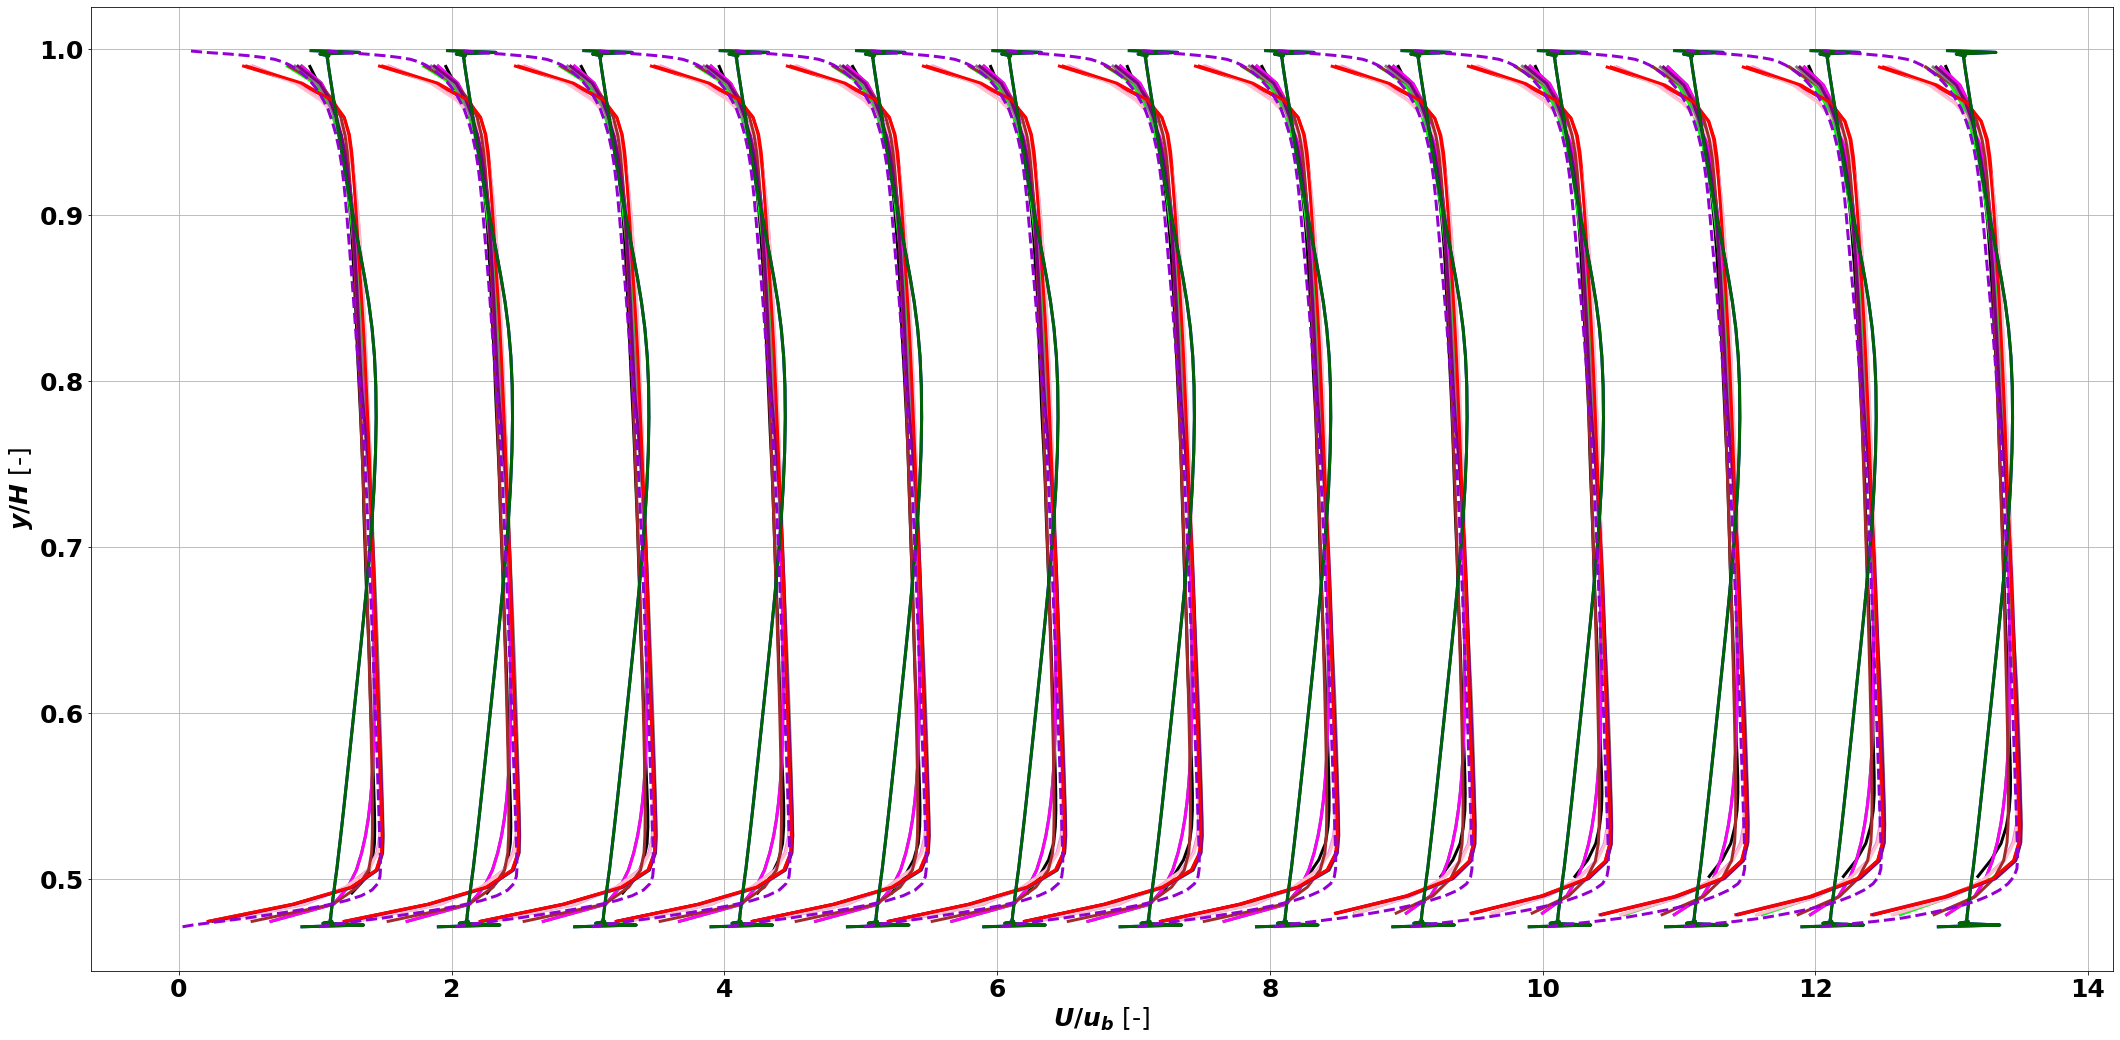

In [47]:
plt.figure(figsize=(30,15), frameon=False)
for i in range(0,len(CENTER_REF)):
    print(i)
    velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U
    plt.plot(BOR_CENTER_REF[i][:,3]+i,                                                         BOR_CENTER_REF[i][:,1],                                                         c="black",   linewidth=3, label='REF.')
    plt.plot(reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                c="red",     linewidth=3, label='reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    #plt.plot(reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1]+i,            reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],             c="blue",    linewidth=3, label='reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(velocity_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                                         velocity_I1_I2_MAPE_C1_8_100_U[i][:,0],                                         c="green",   linewidth=3, label='reynolds_stress_wall_shear_stress_I1_I2_ME_C1_16_200_U')
    plt.plot(velocity_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                                         velocity_I1_I2_MAPE_C1_8_100_U[i][:,0],                                         c="magenta", linewidth=3, label='velocity_I1_I2_MAPE_C1_8_100_U')
    plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                       velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                       c="lime",    linewidth=3, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                         velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                         c="violet",  linewidth=3, label='velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1]+i,                      velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                      c="pink",    linewidth=3, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,1]/2.2+i,        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,0],            c="brown",   linewidth=3, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U')
    plt.plot(velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,1]+i, velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,0], c="grey",    linewidth=3, label='velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U')
    plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1]+i,                    velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                    c="purple",  linewidth=3, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                                wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                                c="red",     linewidth=3, label='wall_shear_stress_I1_I2_MAPE_C1_8_100_U')  
    
    plt.plot(BOR_CENTER_U[i]['U_0']+i,                                                         BOR_CENTER_U[i]['y'],                                                           c='blue',     linewidth=3, label='BOR_CENTER_U')
    plt.plot(BOR_CENTER_U[i]['U_0']+i,                                                         BOR_CENTER_U[i]['y'],                                                           c='darkgreen', linewidth=3, label='BOR_CENTER_U') 
    plt.plot(BOR_CENTER_UVRxy_higher_IC_NEW[i]['U_0']/2.2+i,                                   BOR_CENTER_UVRxy_higher_IC_NEW[i]['y'],                                         c='darkviolet', linewidth=3, linestyle='dashed',label='BOR_CENTER_UVRxy_higher_IC_NEW')
    
plt.ylabel("$y/H$ [-]")
plt.xlabel("$U/u_{b}$ [-]")
plt.tight_layout()
plt.grid()
plt.show()
plt.close()

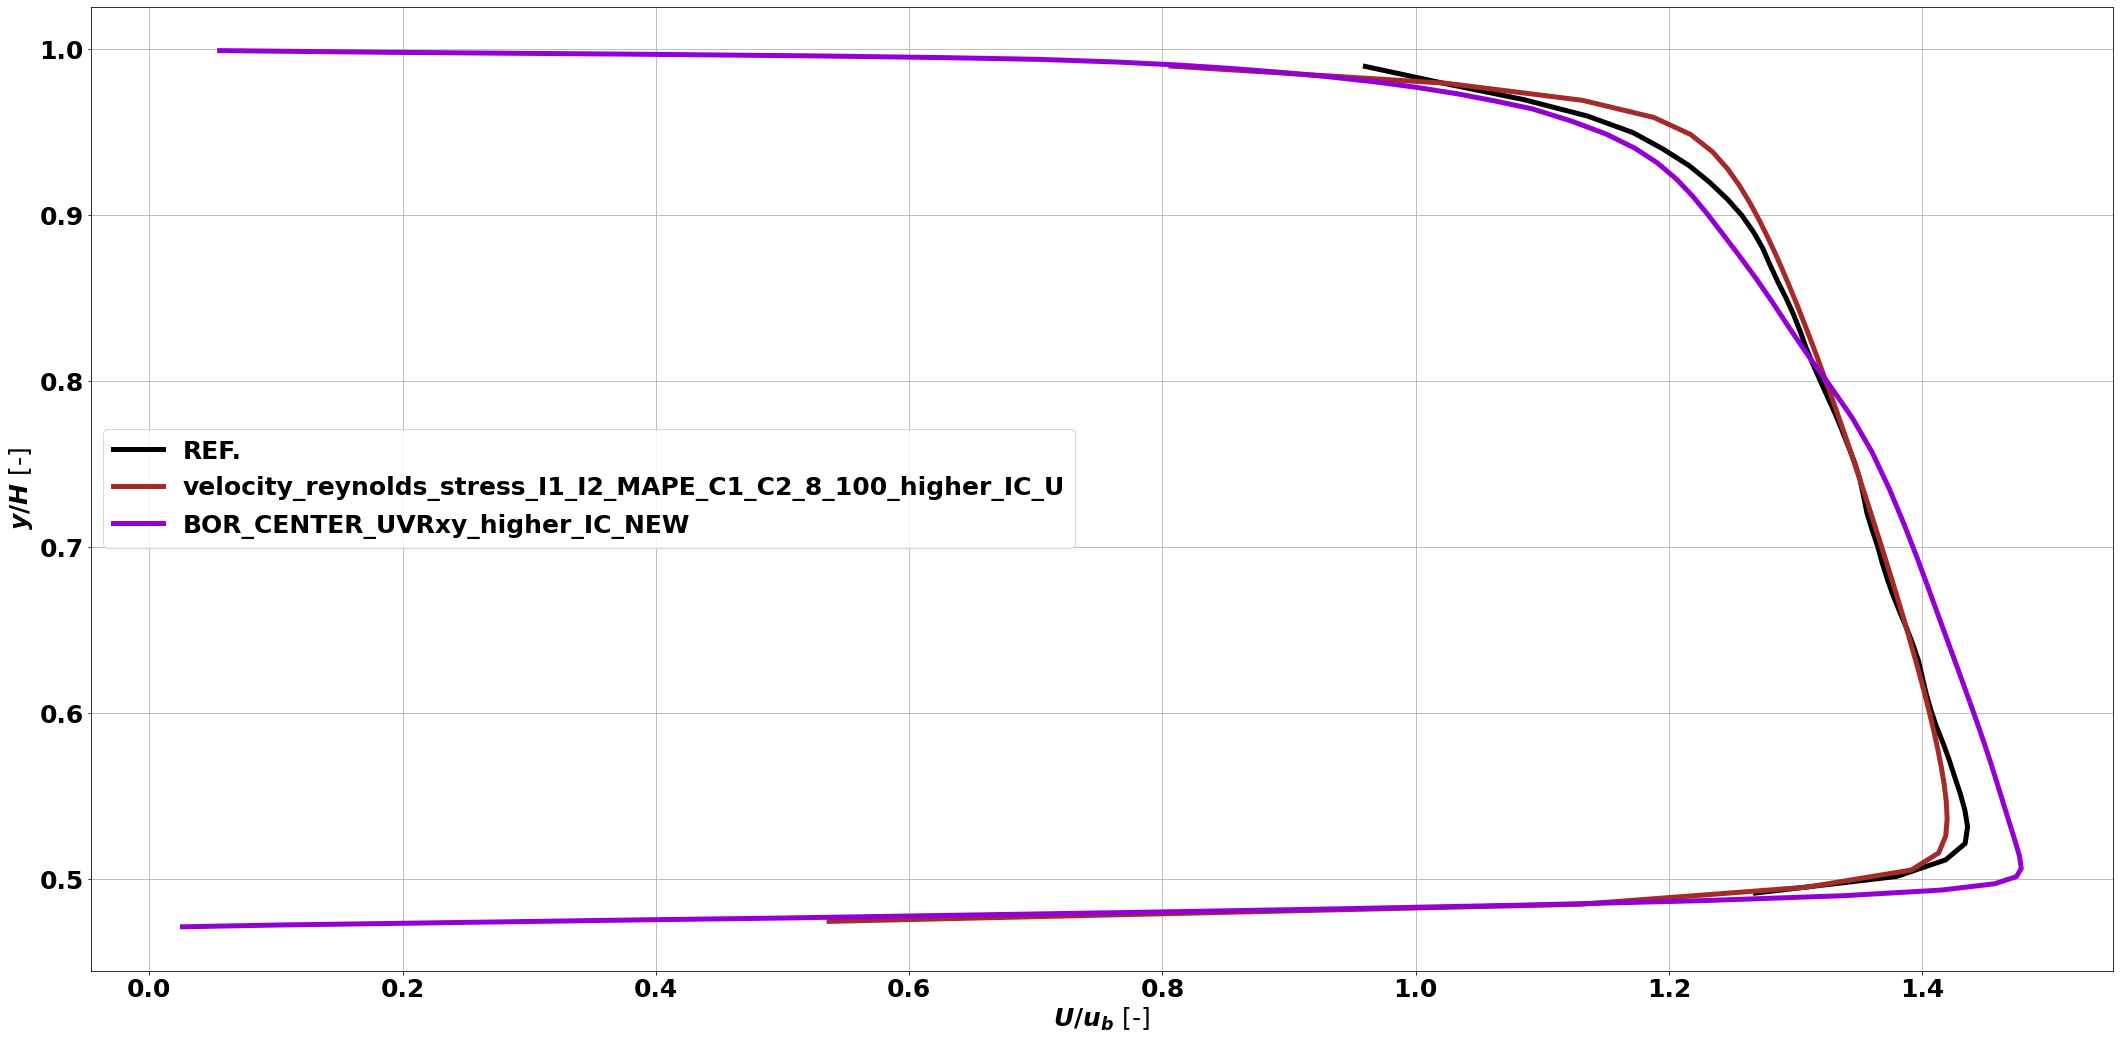

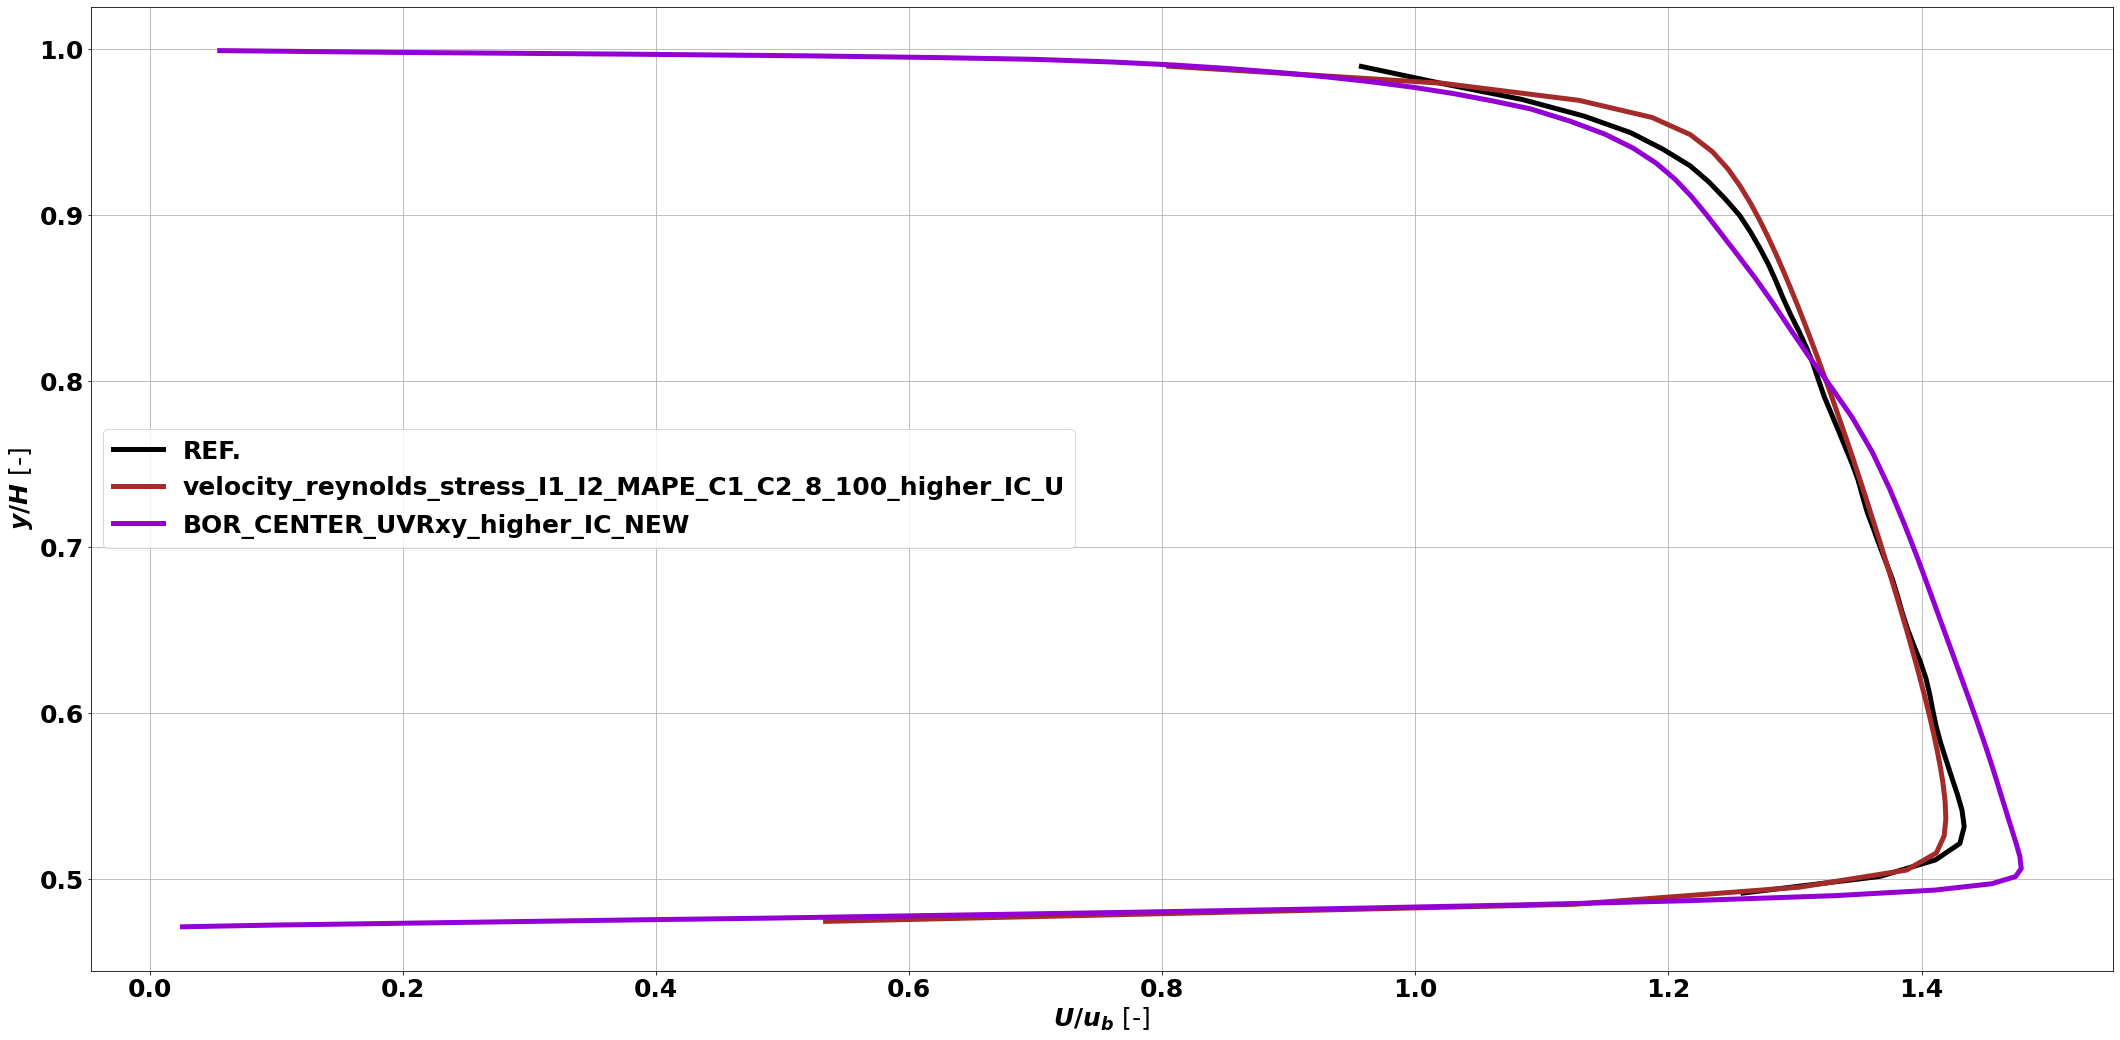

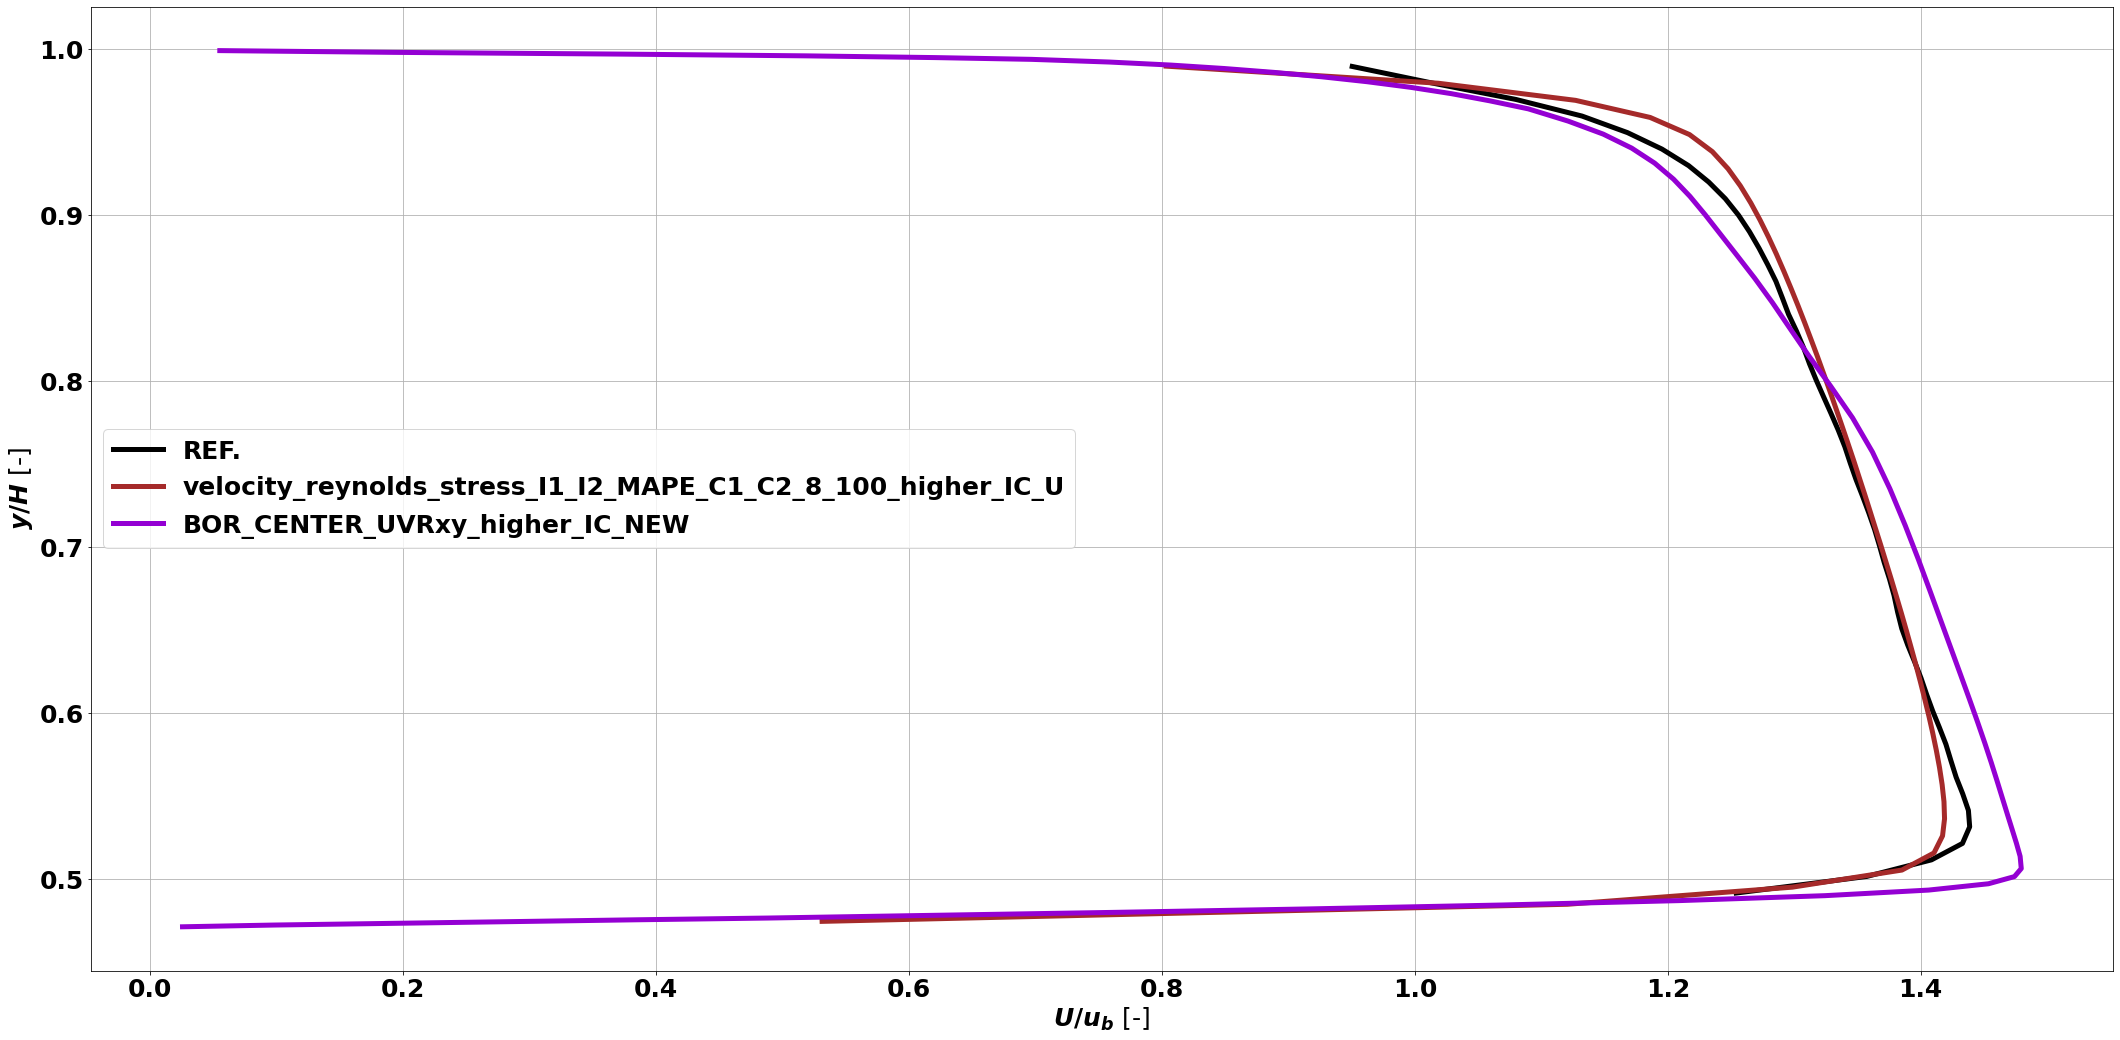

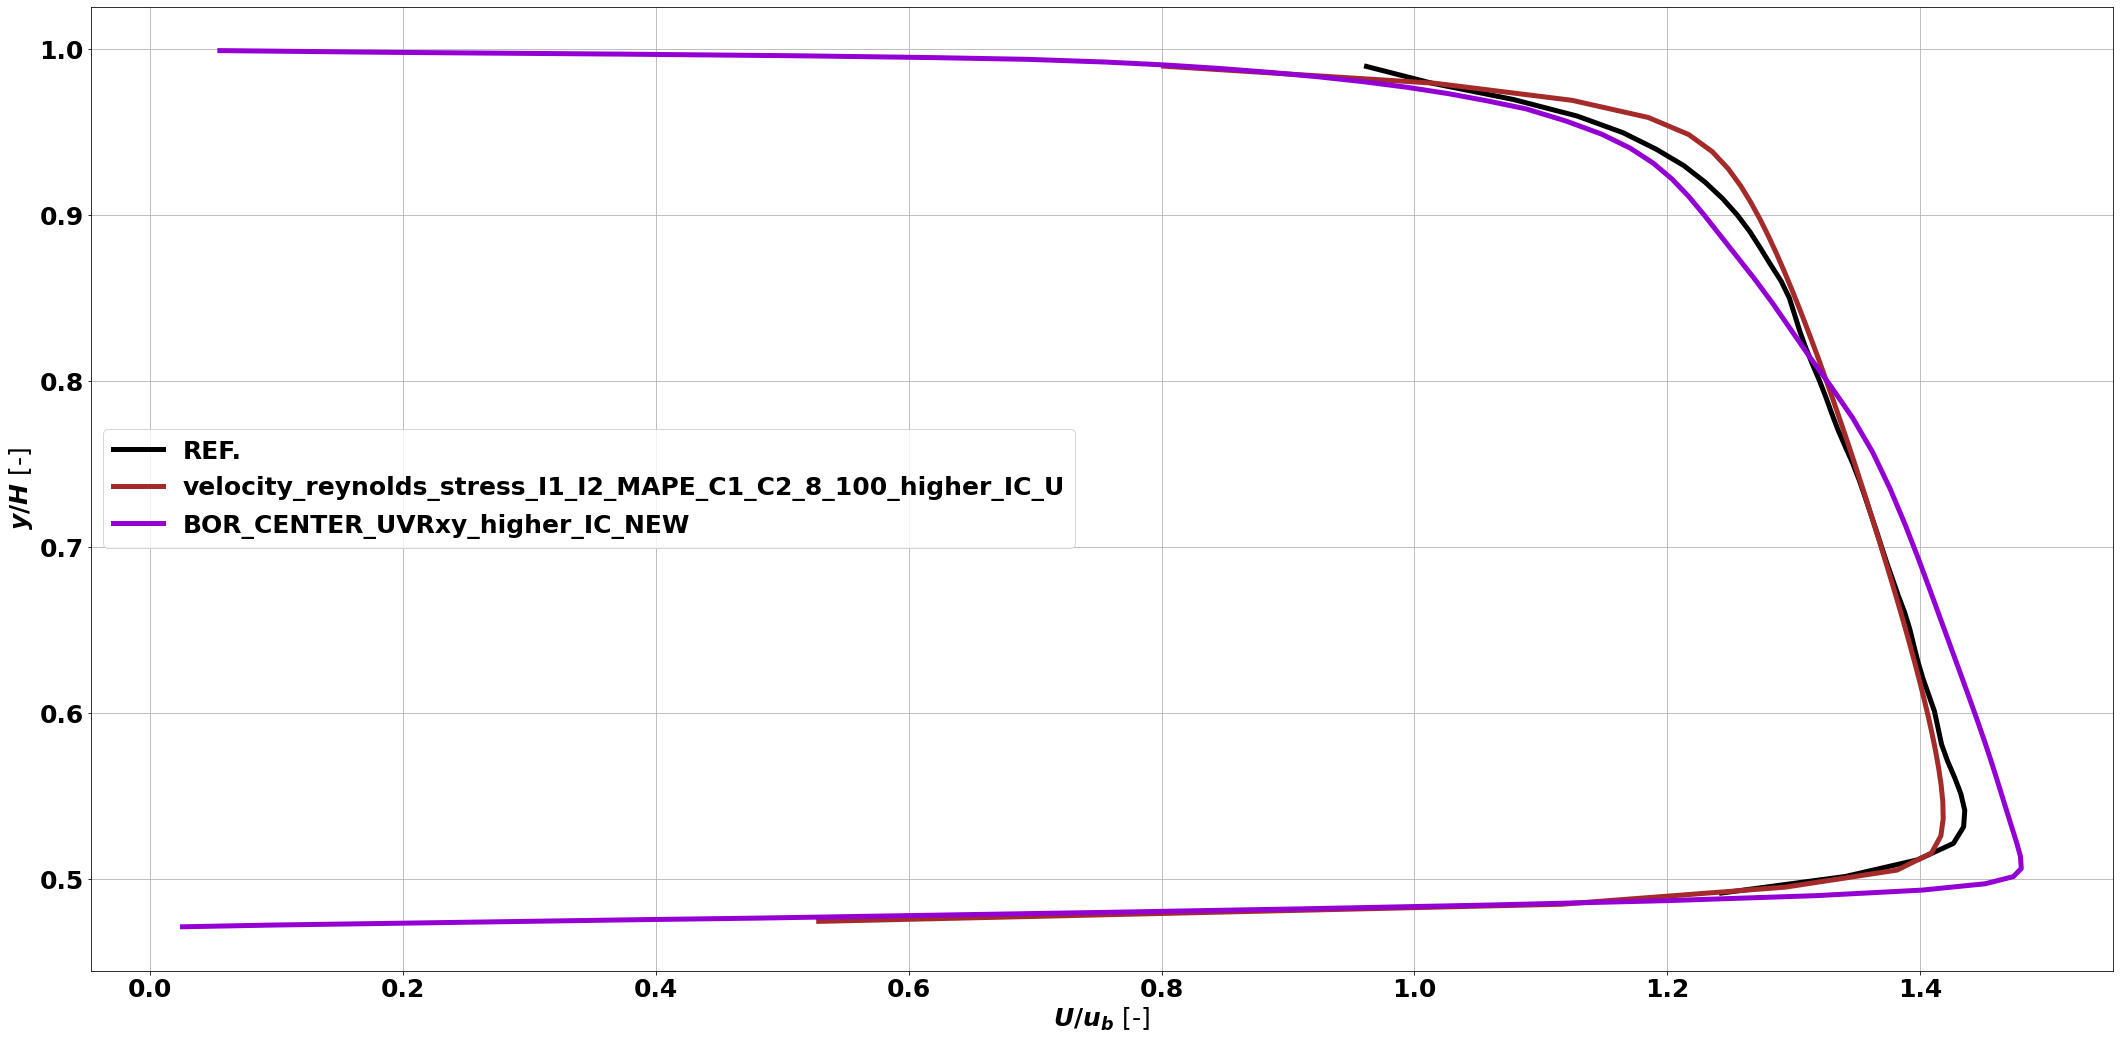

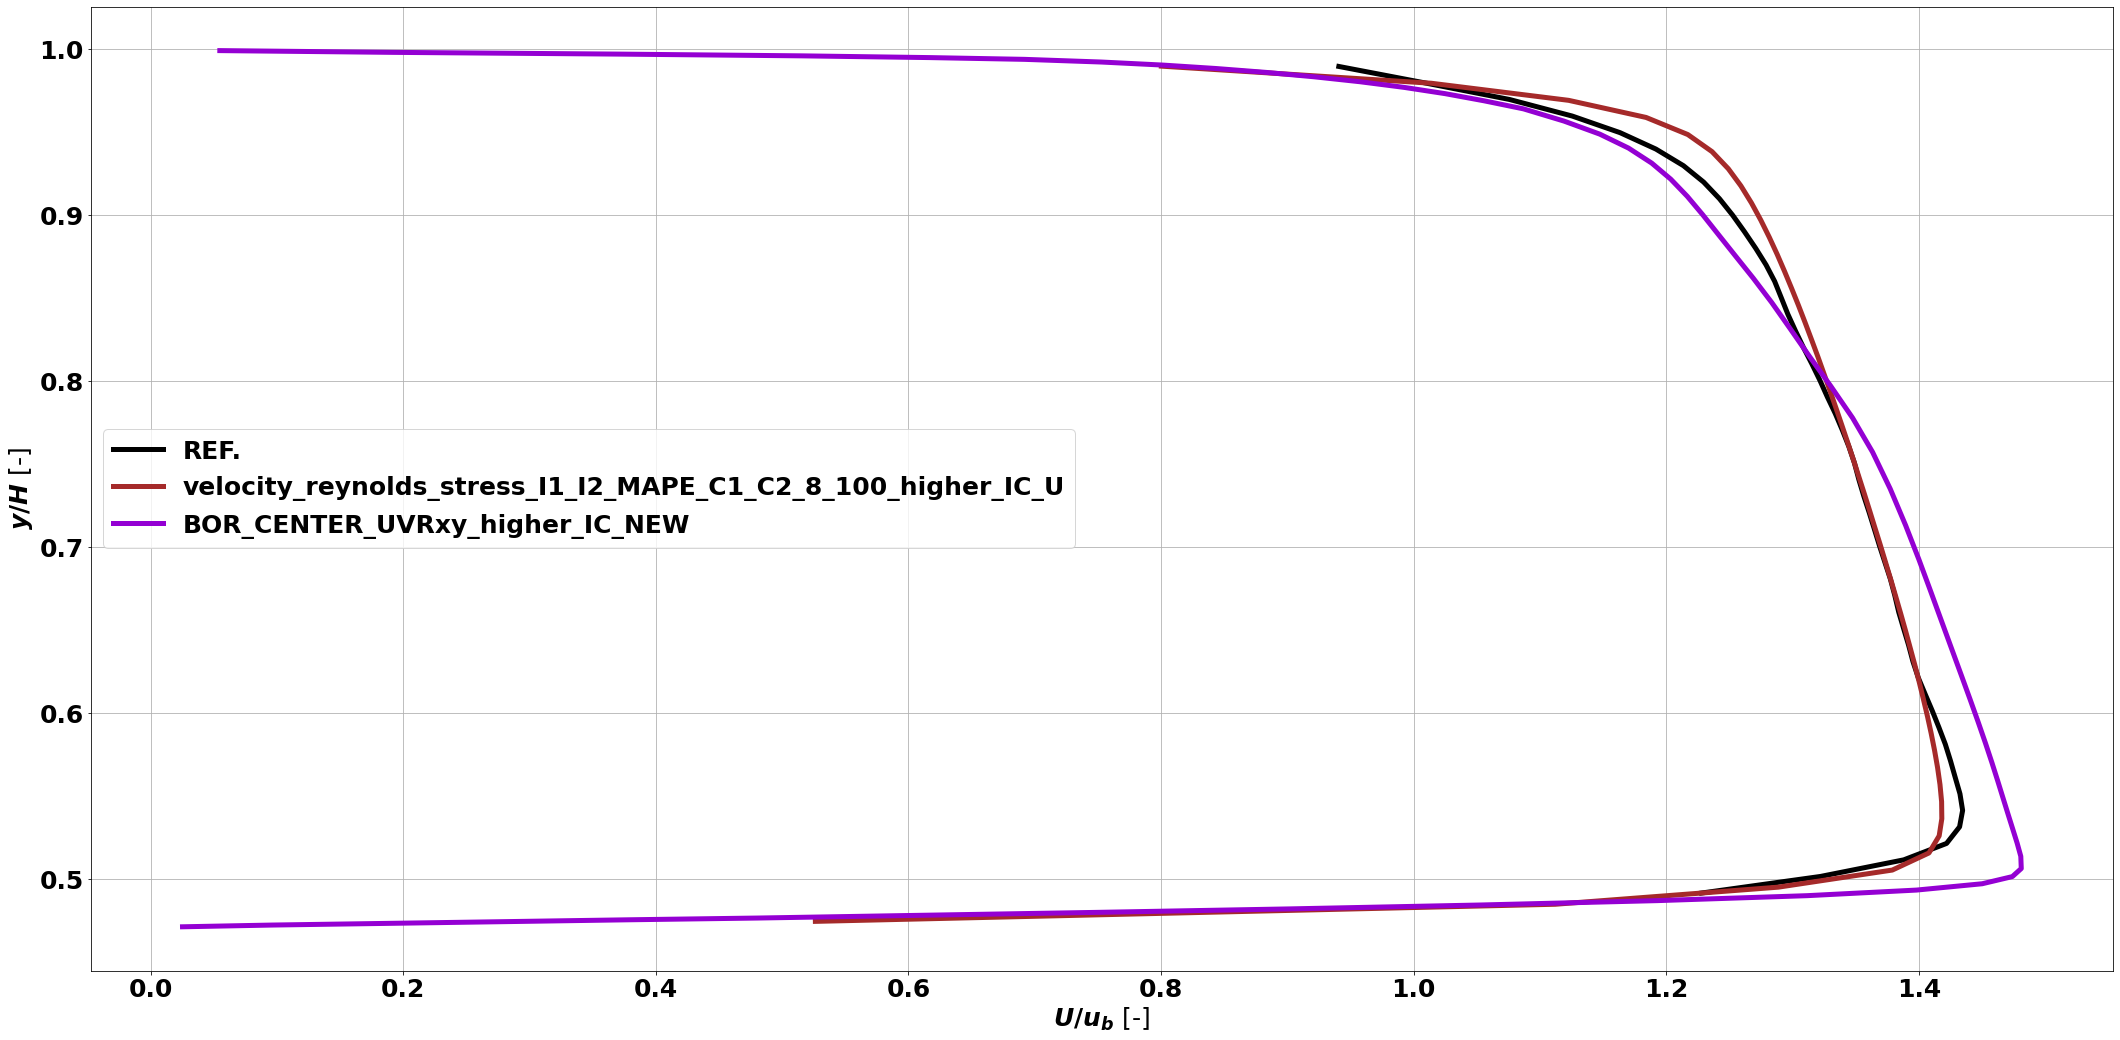

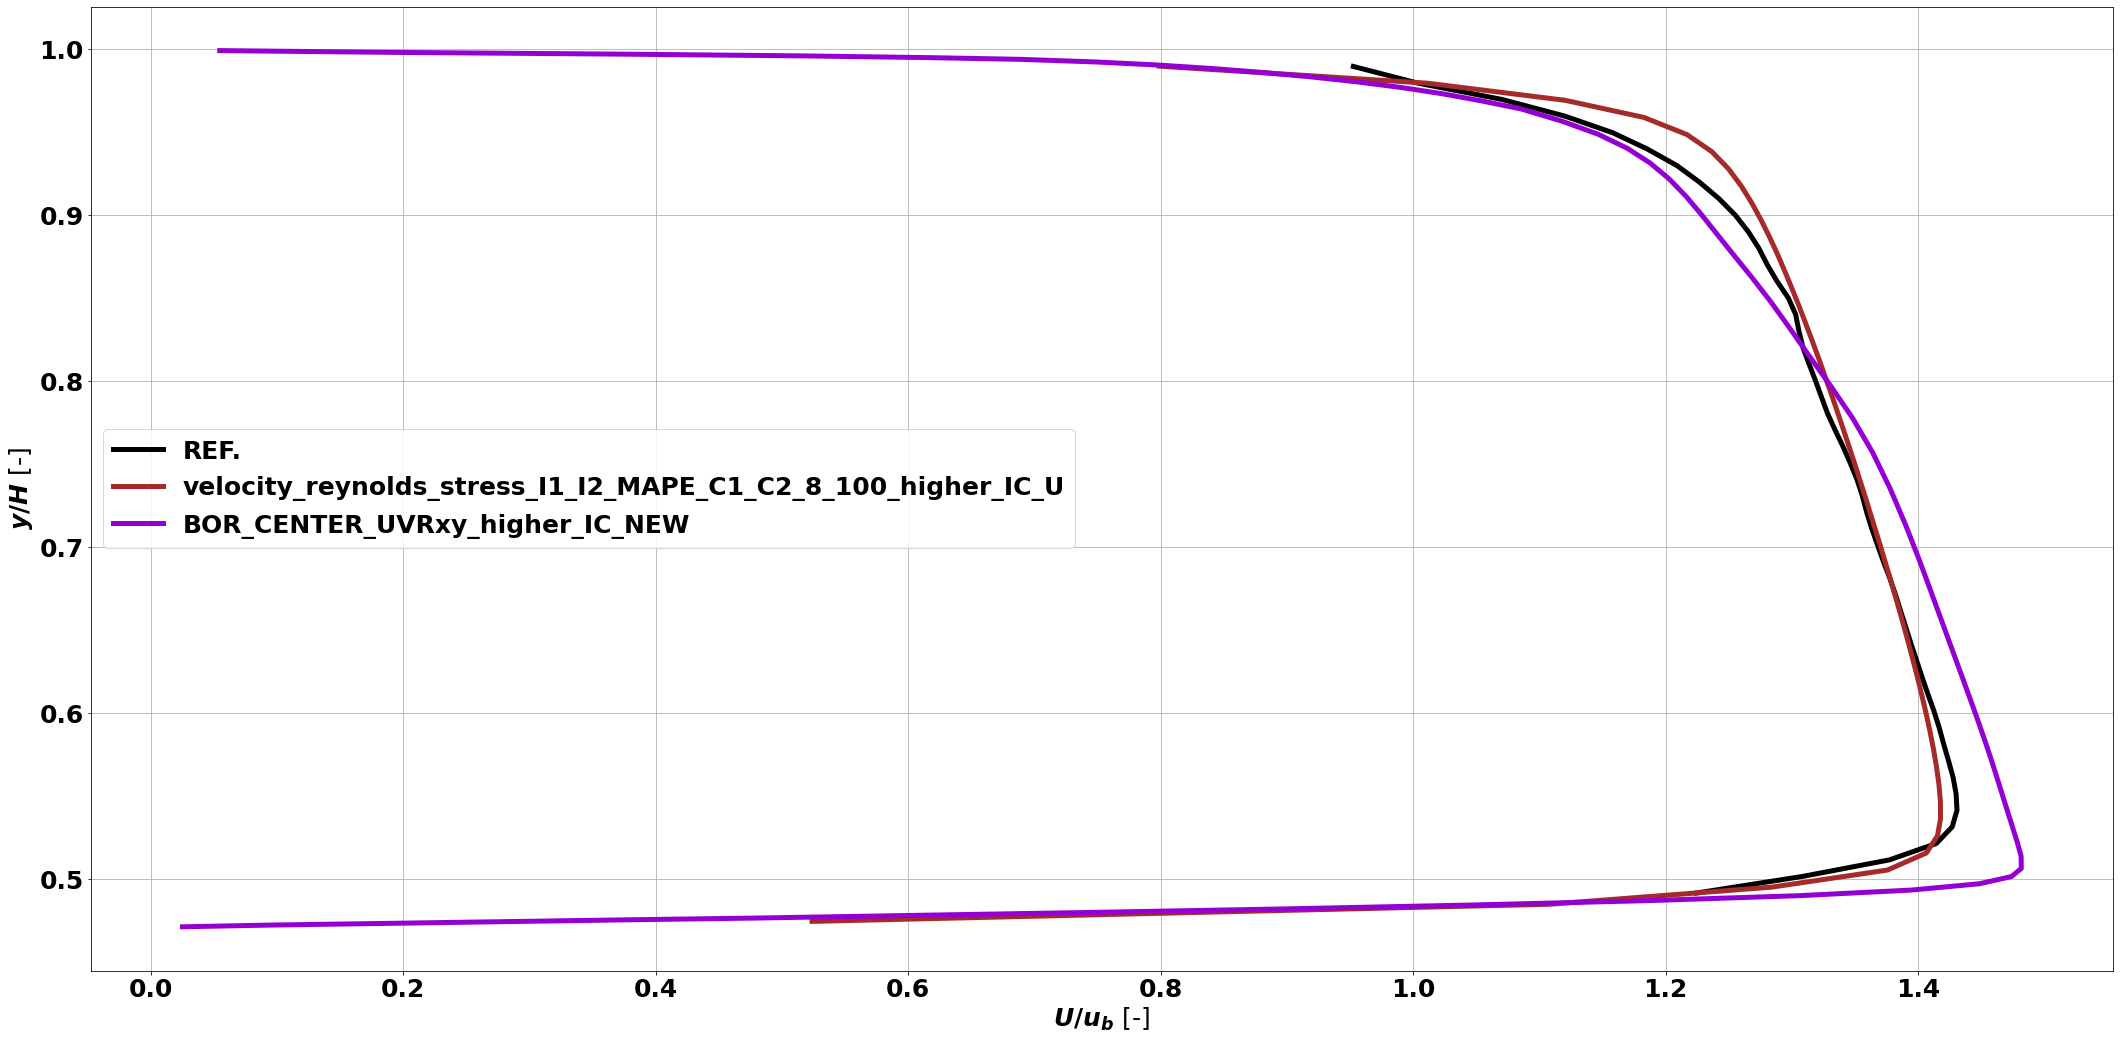

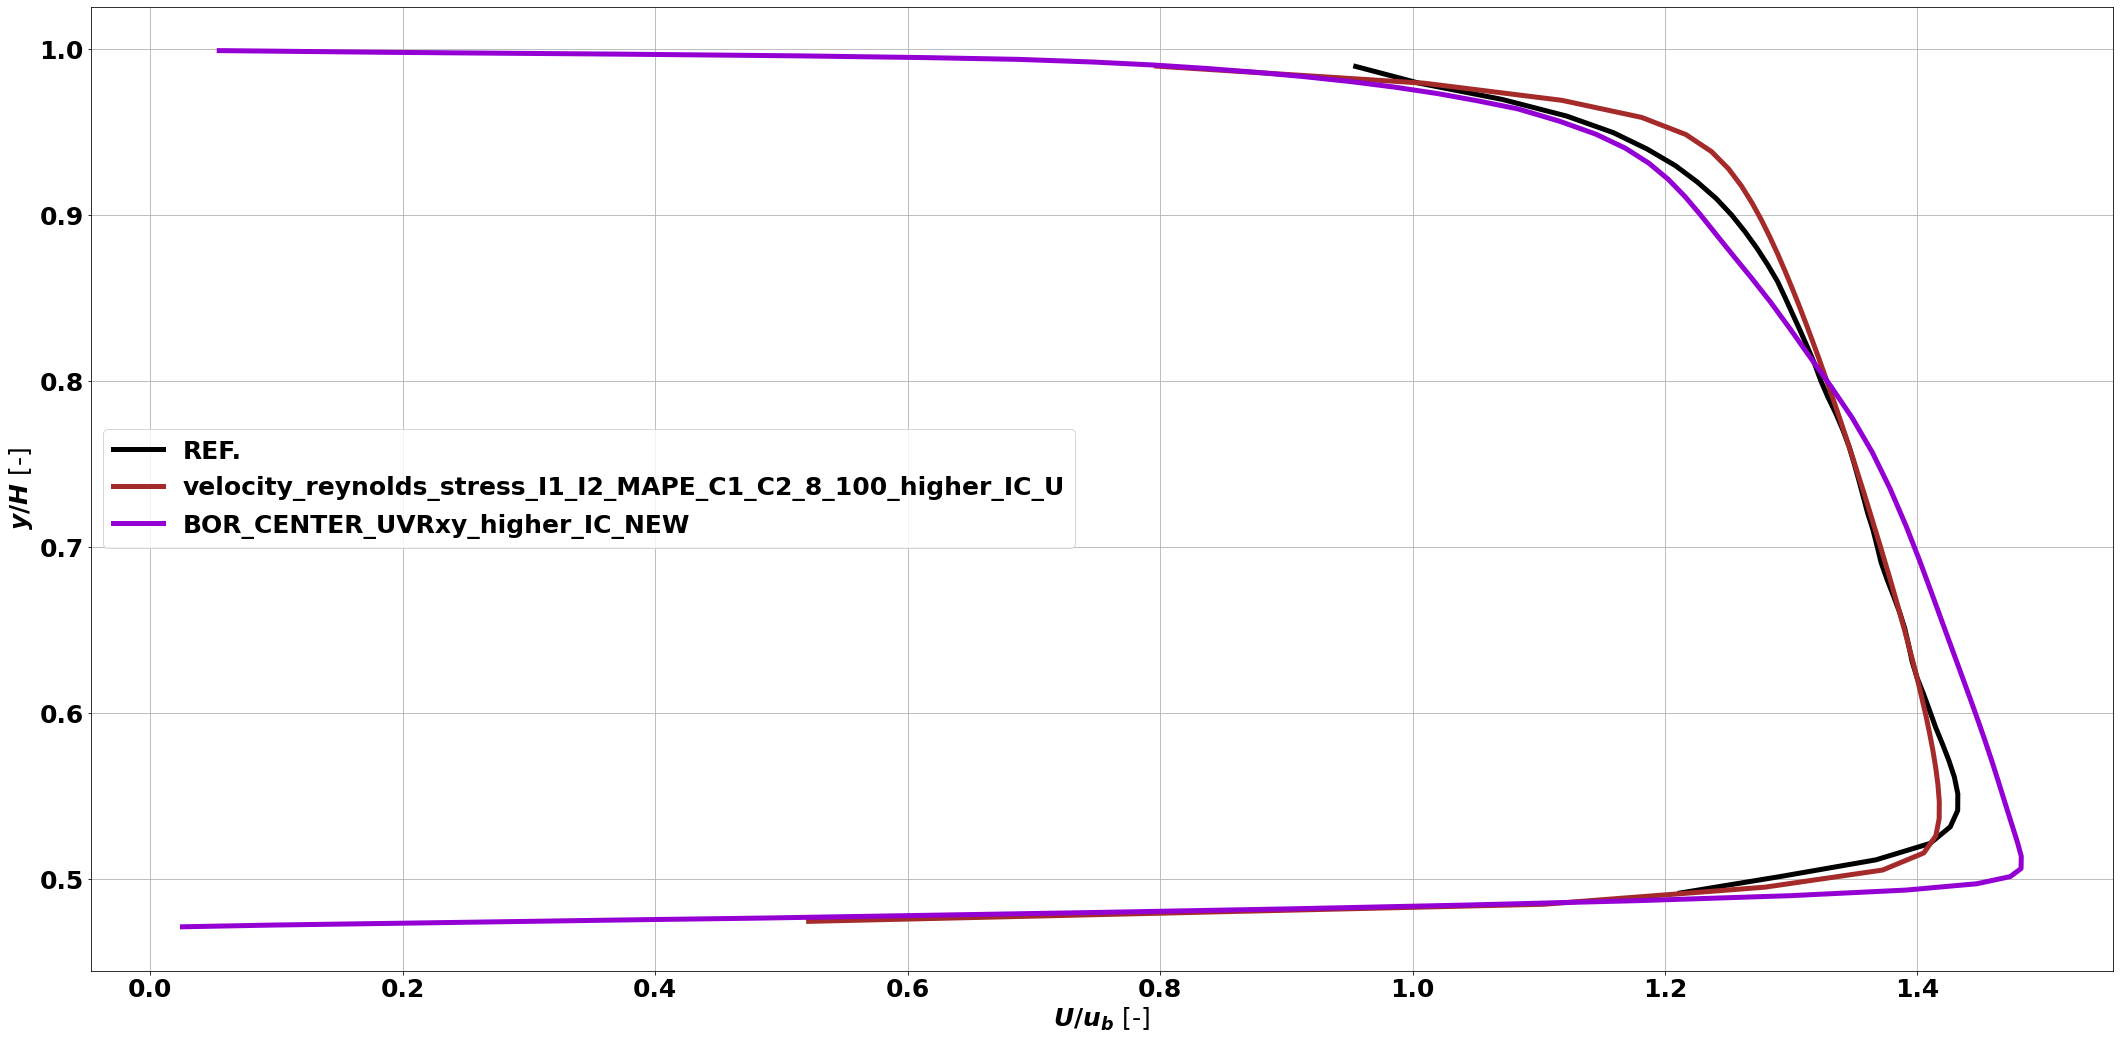

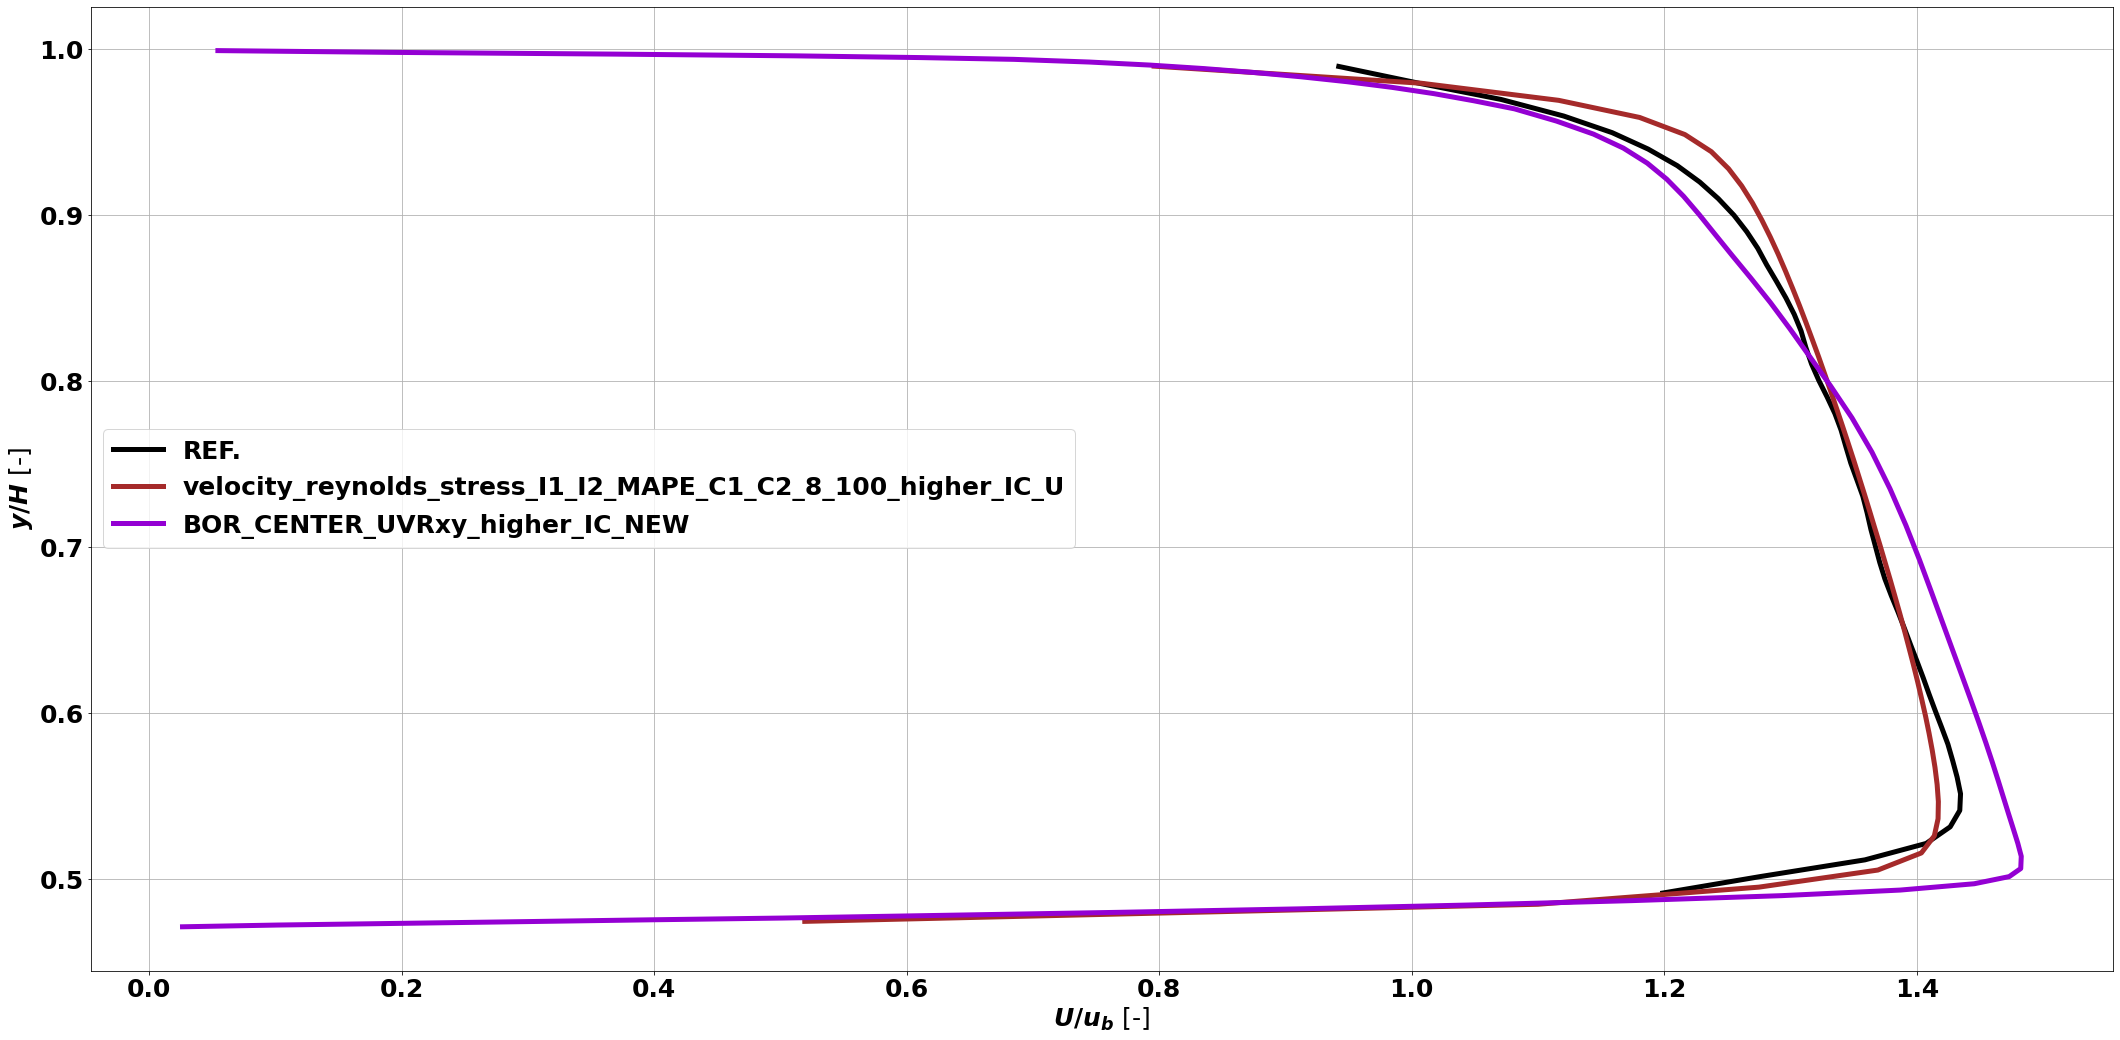

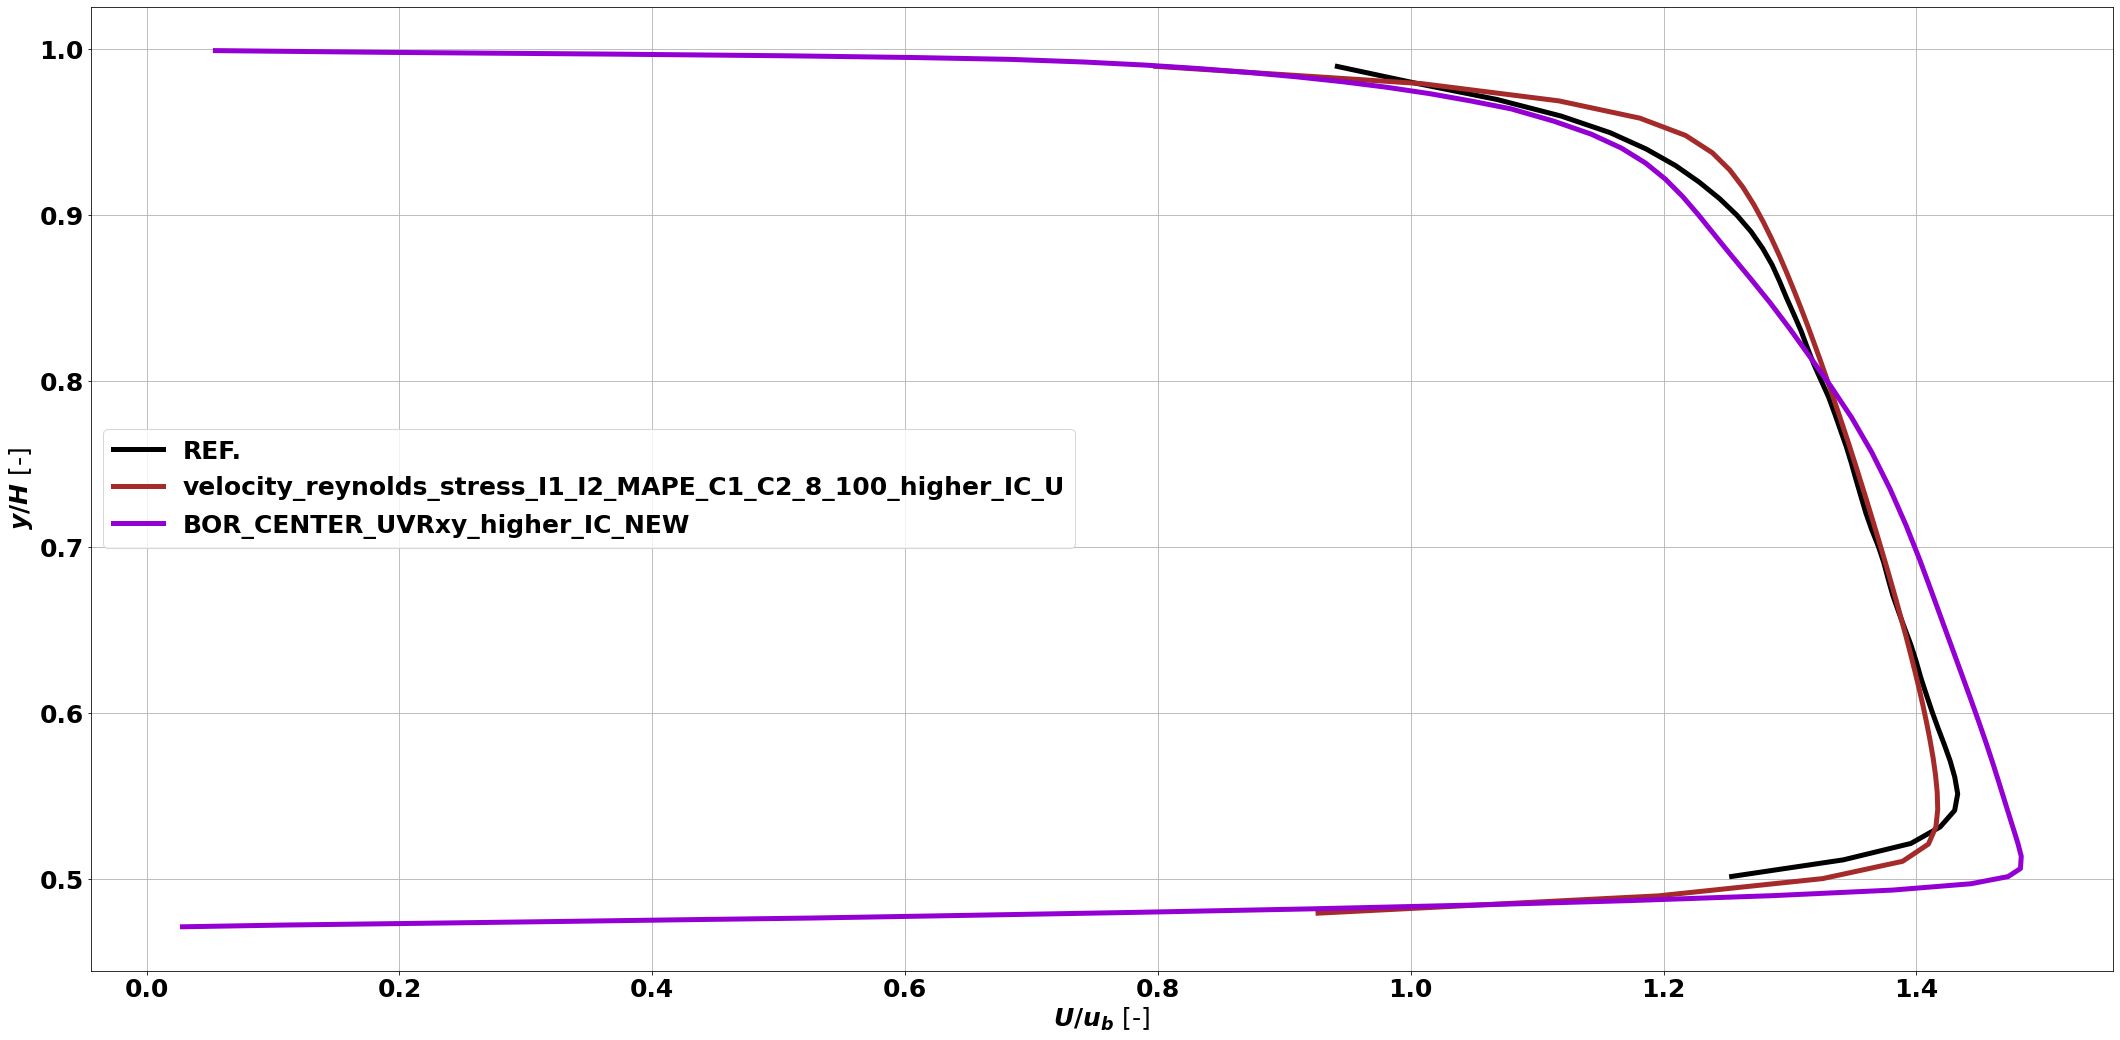

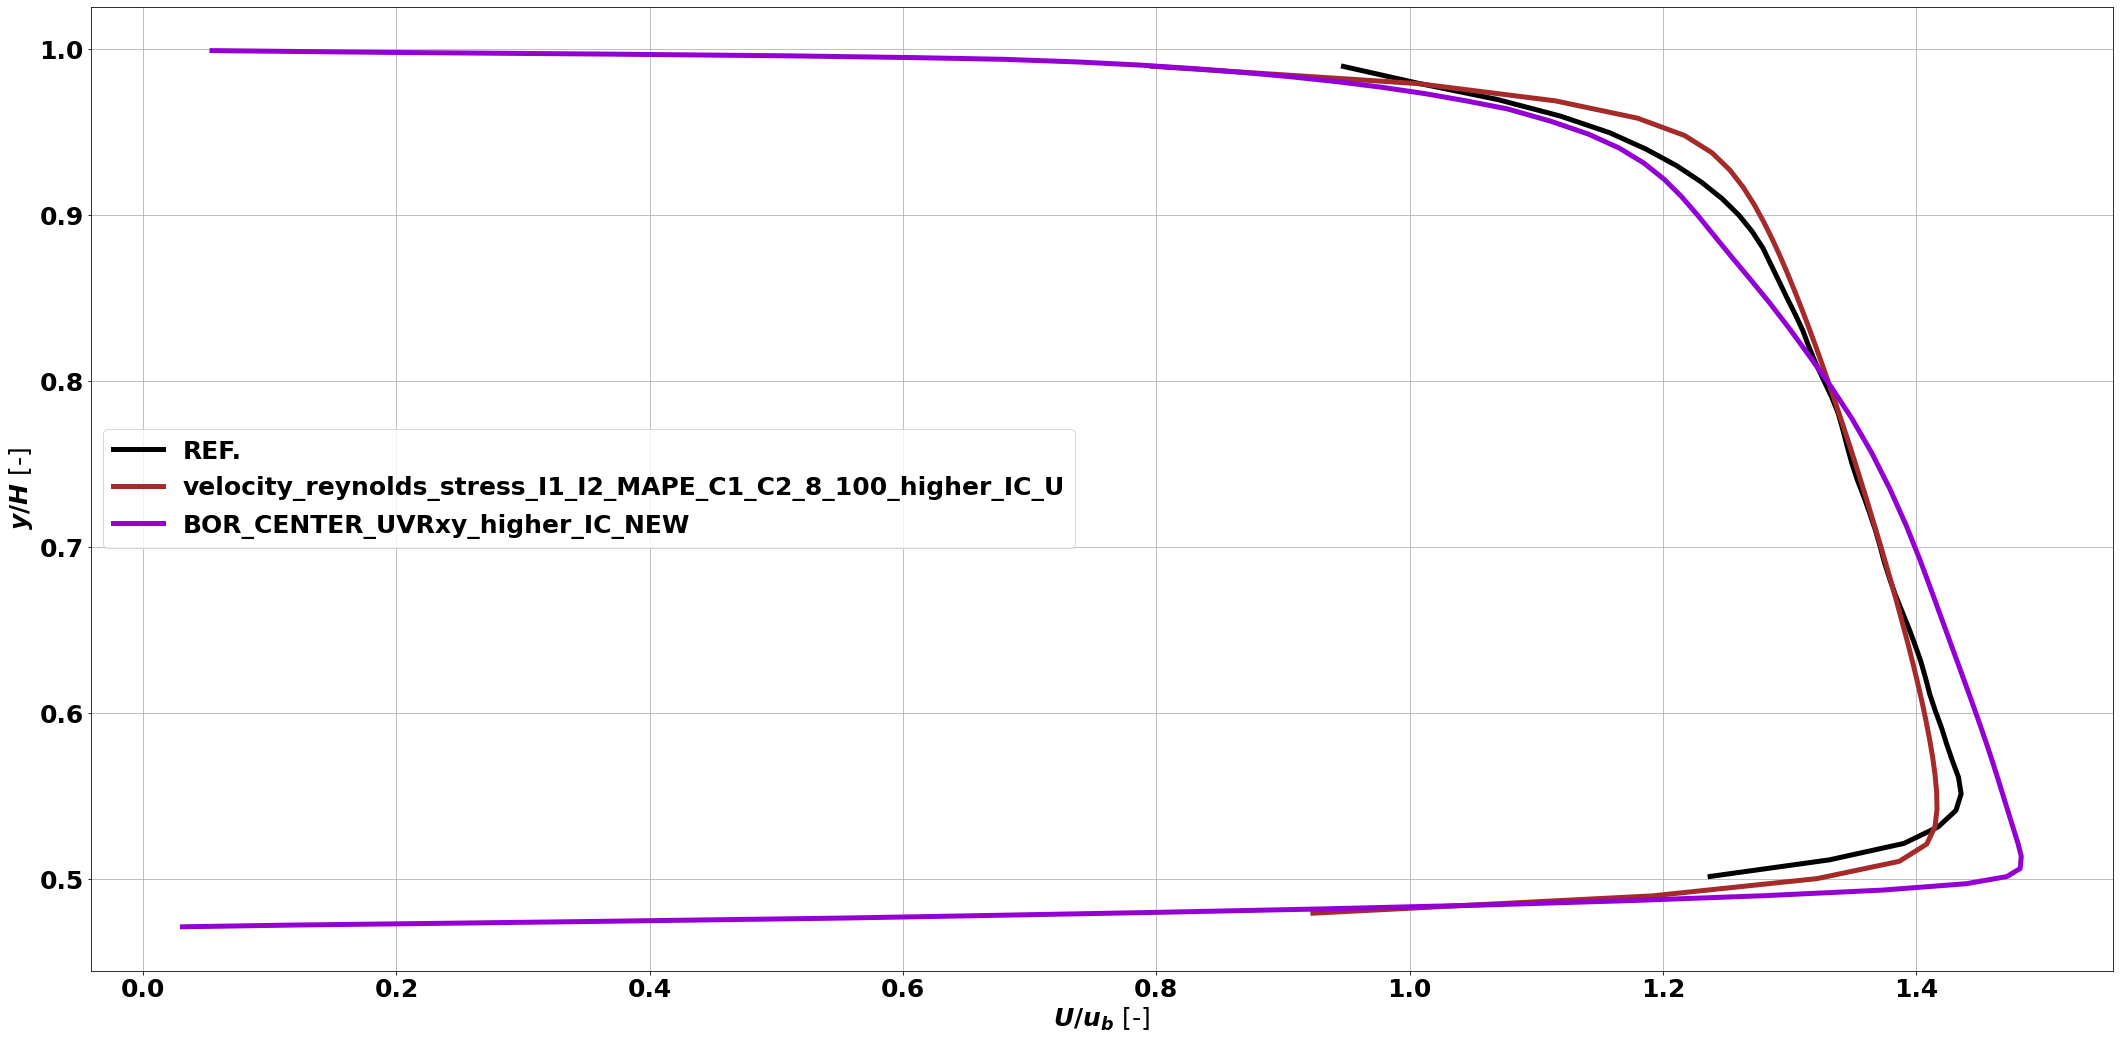

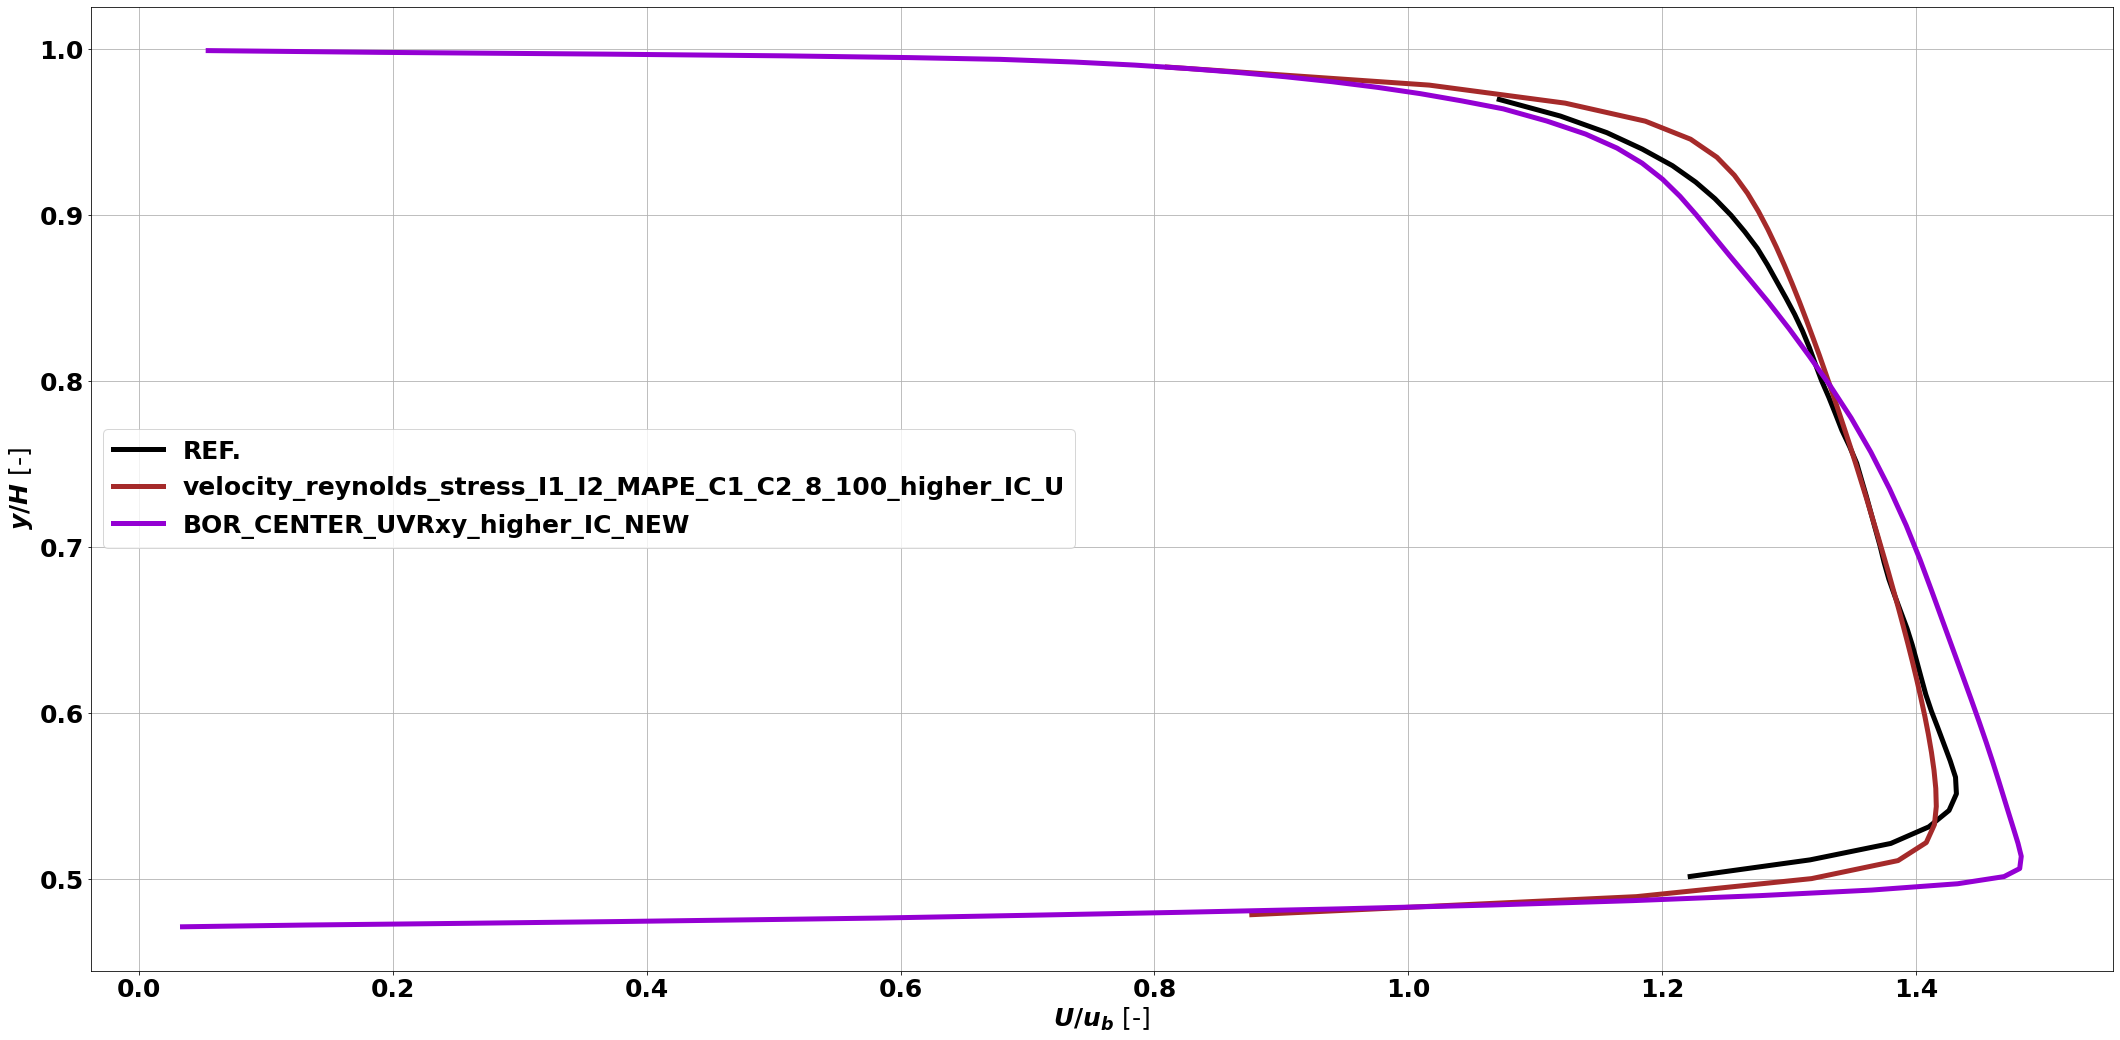

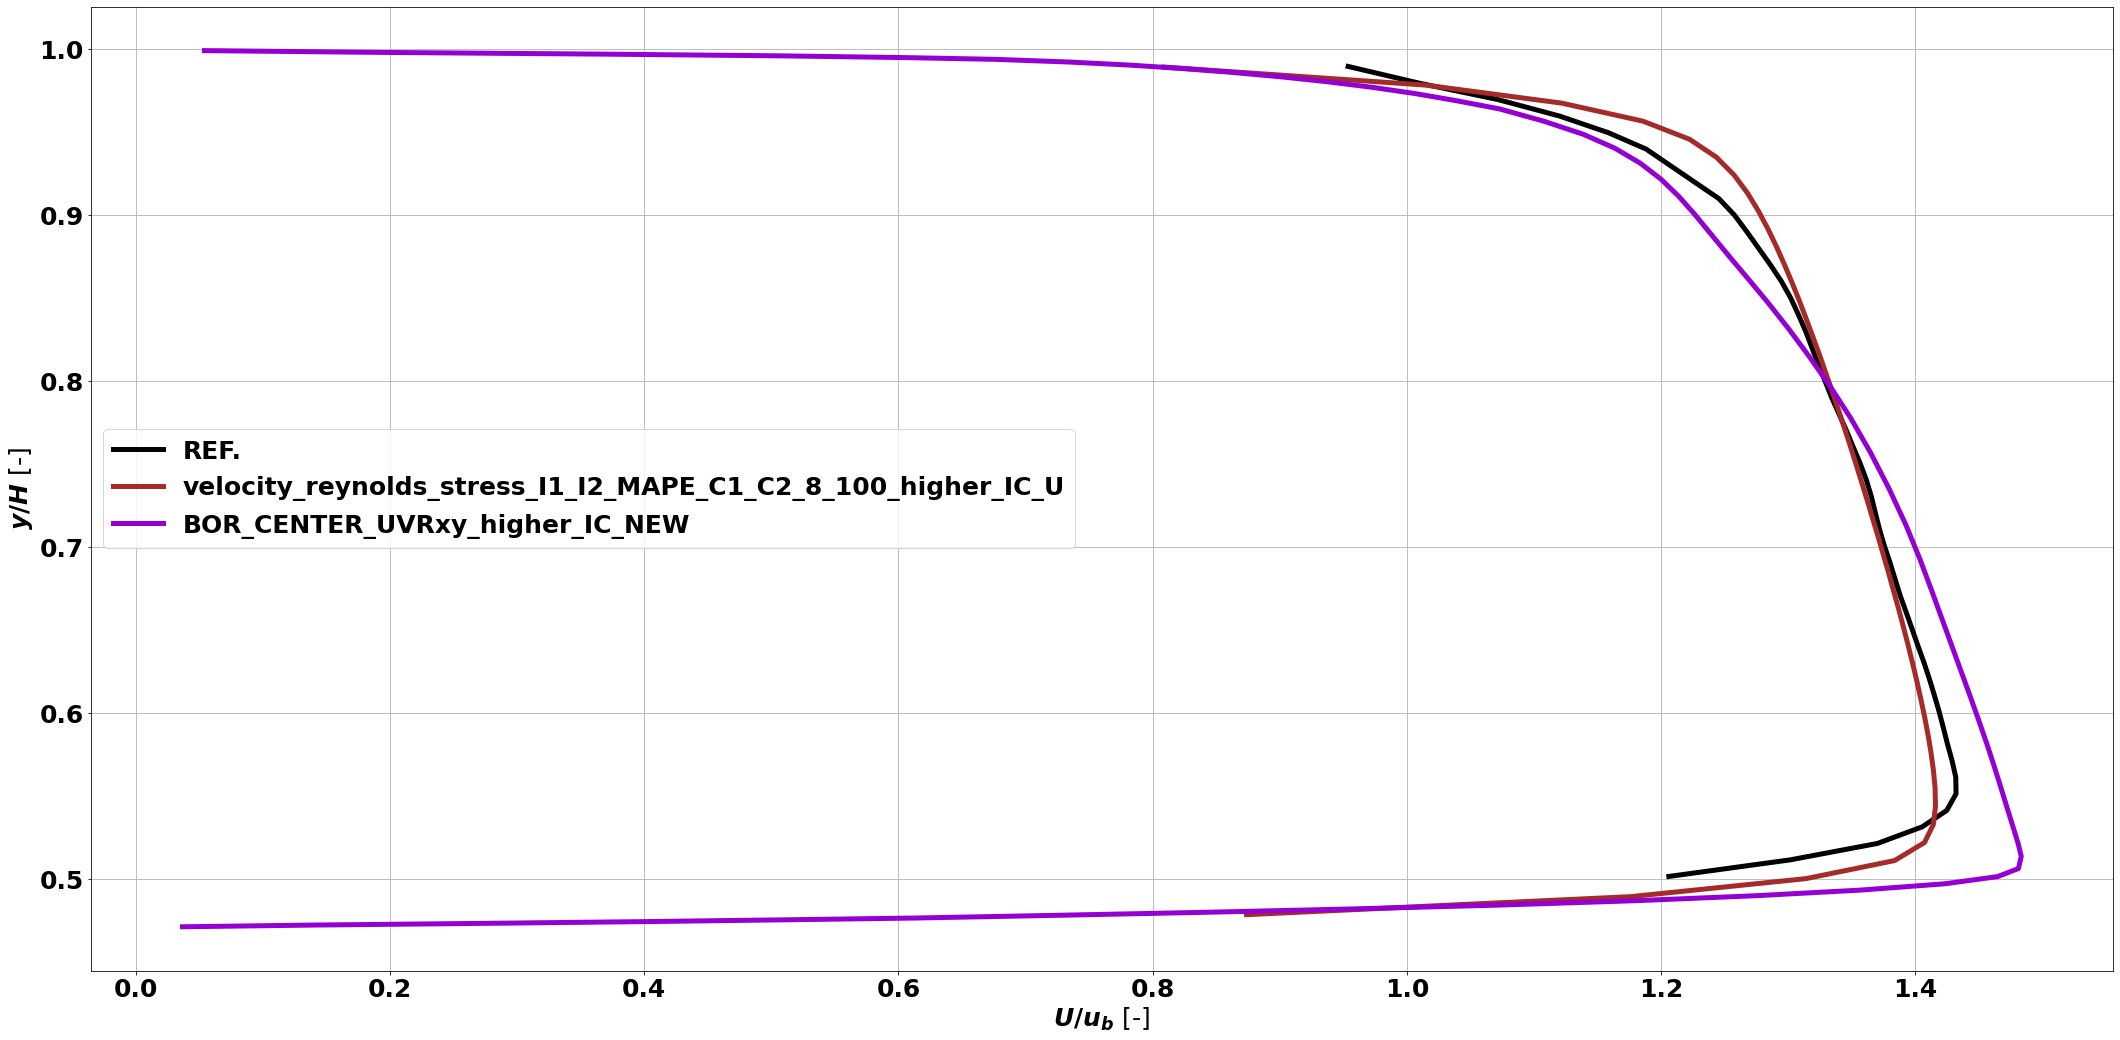

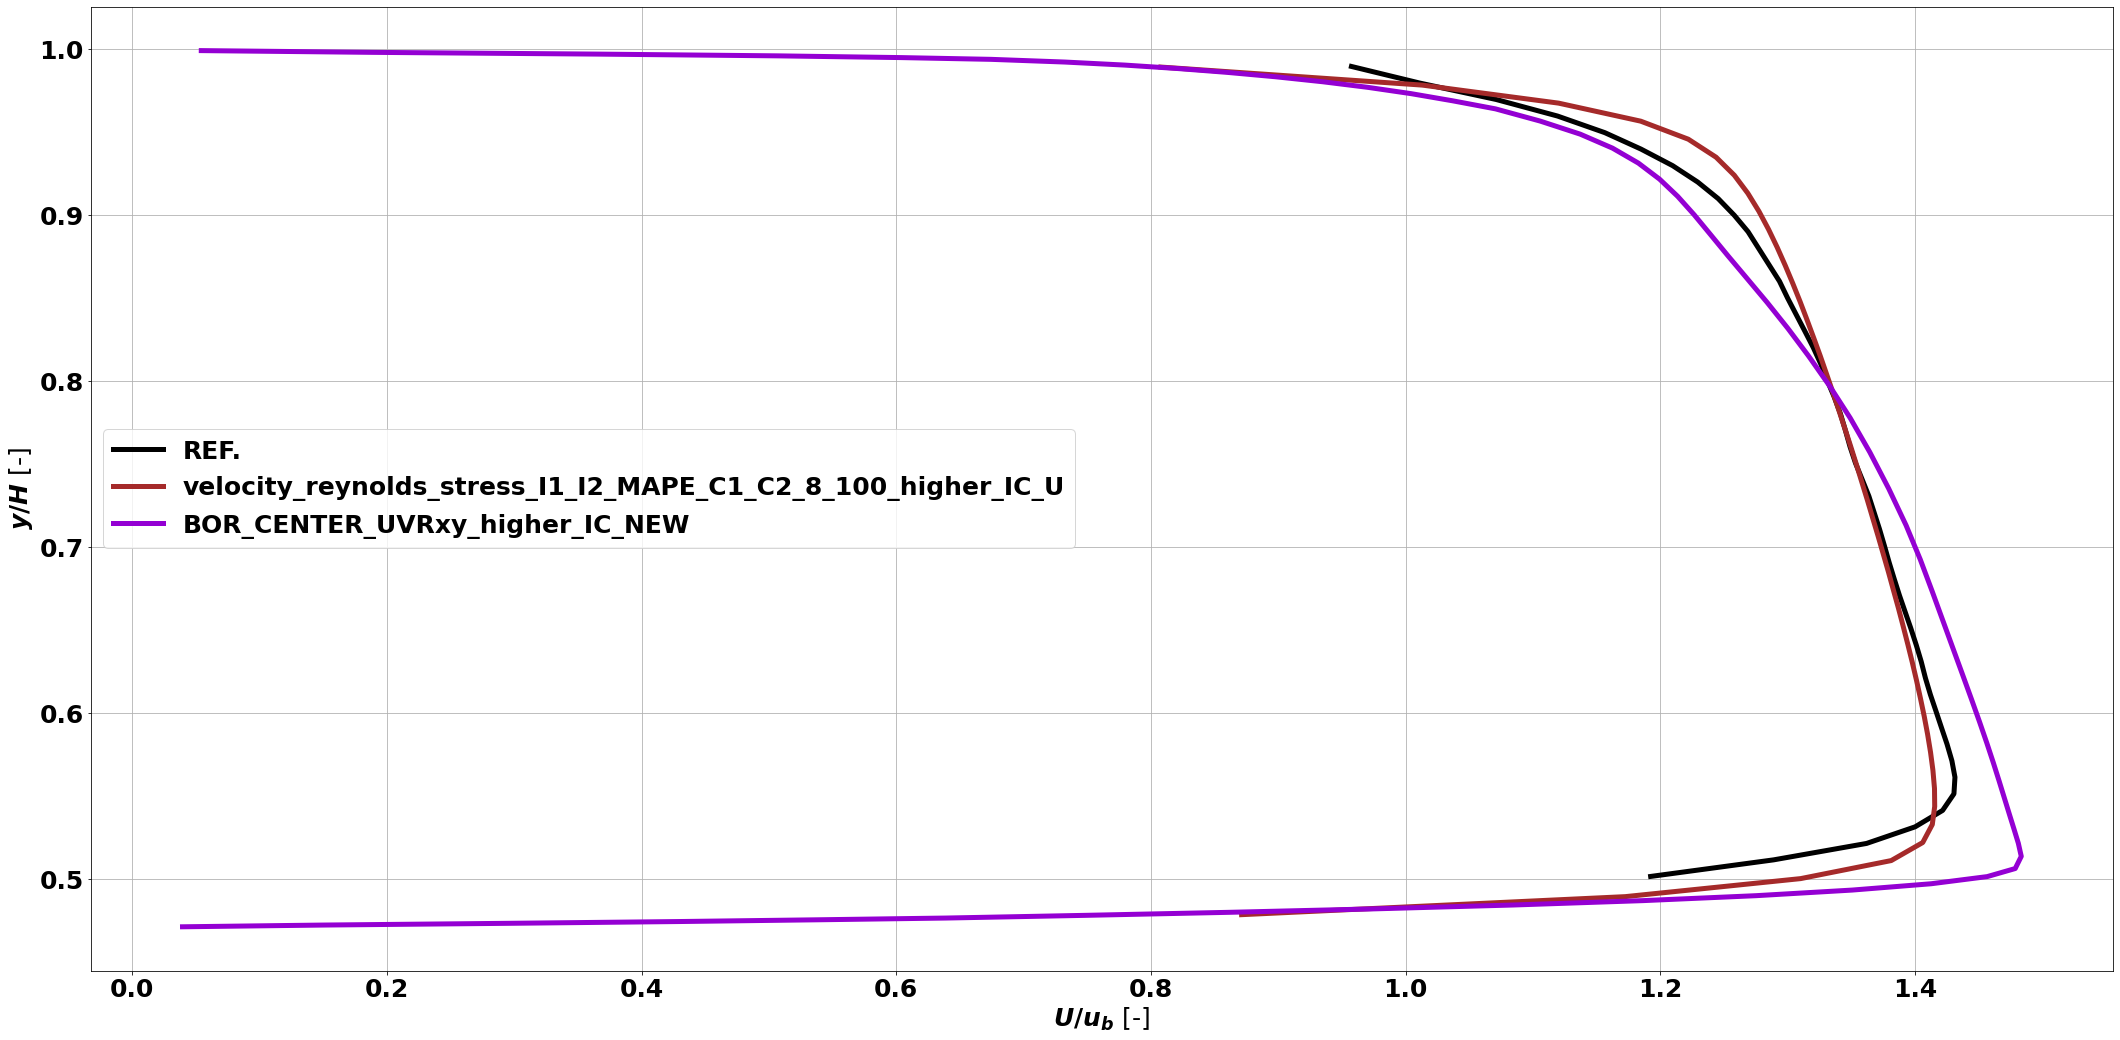

In [51]:
lw = 5 
for i in range(0,len(CENTER_REF)):
    plt.figure(figsize=(30,15), frameon=False)
    
    plt.plot(BOR_CENTER_REF[i][:,3],                                                          BOR_CENTER_REF[i][:,1],                                                         c="black",      linewidth=lw, label='REF.')
    #plt.plot(reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                c="red",        linewidth=lw, label='reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    #plt.plot(velocity_I1_I2_MAPE_C1_8_100_U[i][:,1],                                         velocity_I1_I2_MAPE_C1_8_100_U[i][:,0],                                         c="green",      linewidth=lw, label='reynolds_stress_wall_shear_stress_I1_I2_ME_C1_16_200_U')
    #plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                       velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                       c="lime",       linewidth=lw, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    #plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                         velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                         c="violet",     linewidth=lw, label='velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U')
    #plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1],                      velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                      c="pink",       linewidth=lw, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,1]/2.2,         velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,0],            c="brown",      linewidth=lw, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U')
    #plt.plot(velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,1], velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,0], c="grey",       linewidth=lw, label='velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U')
    #plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1],                    velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                    c="purple",     linewidth=lw, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U')
    #plt.plot(wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                                wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                                c="red",        linewidth=lw, label='wall_shear_stress_I1_I2_MAPE_C1_8_100_U')  
    #
    #plt.plot(BOR_CENTER_U[i]['U_0'],                                                         BOR_CENTER_U[i]['y'],                                                           c='blue',       linewidth=lw, label='BOR_CENTER_U')
    #plt.plot(BOR_CENTER_U[i]['U_0'],                                                         BOR_CENTER_U[i]['y'],                                                           c='darkgreen',  linewidth=lw, label='BOR_CENTER_U') 
    plt.plot(BOR_CENTER_UVRxy_higher_IC_NEW[i]['U_0']/2.2,                                    BOR_CENTER_UVRxy_higher_IC_NEW[i]['y'],                                         c='darkviolet', linewidth=lw, label='BOR_CENTER_UVRxy_higher_IC_NEW')
    
    plt.ylabel("$y/H$ [-]")
    plt.xlabel("$U/u_{b}$ [-]")
    plt.tight_layout()
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()

In [52]:
print('BEST MODEL')
print('==========')
!tail -n 10 ../03_Training/BOR-in-the-loop_BOW/velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC/slurm-43963162.out
print()
print('BEST FIT')
print('========')
!tail -n 1  ../03_Training/BOR-in-the-loop_BOW/velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC/study_log_data_algo1.csv

BEST MODEL

After 100 generations, best colony has index 1 and fitness value of 0.076278
Expression: 0 	((0.089-((((I1)*(((2.0)-(I2)))))+(((I1)-(0.430)))))-(((((I1)*(((-0.15)*(0.097)))))+(((I2)+(0.430))))*0.430))
Expression: 1 	((((((-0.15)-(((I2)*(-1.0)))))-(I2))-((((I2)+(0.430)))-(0.205)))*(I1*((((1.0)-(I2)))*(I1))))
Expression: 2 	((2.0*((((I1)*(I2)))-(((I1)*(2.0)))))-(((-0.15)-(0.205))-((1.0)-(I2))))
Expression: 3 	((2.0*0.430)+(((((((I2)-(0.430)))+(((0.430)*(0.089)))))+(I2))+((((I1)-(((0.097)*(0.430)))))-(((-1.0)*(0.089))))))
Expression: 4 	((((I2)*(0.089))-((I2)+(-0.15)))-(I1-((0.089)*(((I2)+(I2))))))
Expression: 5 	((((I2)-(((((I2)-(I2)))+(((I2)*(0.205))))))+((((I1)+(((I1)+(0.205)))))+(I1)))+(2.0*((1.0)+(((((0.089)*(-1.0)))+(0.097))))))
Run ID: 00244
The End.

BEST FIT
100,0.07627763843651716,00244,12,3,6,0.9,0.75,0.45,0.0,0.0,0.0,0.0,0


In [53]:
print('BEST MODEL')
print('==========')
!cat       ../03_Training/BOR_CENTER_UVRxy_pop100_gen100_higher_IC_NEW/running_pfac150_pop10_seed0/run_00399/input_00399
print()
print('BEST FIT')
print('========')
!tail -n 1 ../03_Training/BOR_CENTER_UVRxy_pop100_gen100_higher_IC_NEW/study_log_data_algo1.csv

BEST MODEL
((((((I02)+(0.20552675214328775)))*(((-0.15269040132219058)-(2.0))))*I01)*(((((((1.0)*(I02)))+(((0.20552675214328775)-(1.0)))))*(((0.43037873274483895)-(2.0))))+((I02)+(((I01)+(-1.0))))))
((((-1.0)*(I02))*((((0.20552675214328775)*(((1.0)*(1.0)))))+(I02)))+(I01+((0.0976270078546495)-(I01))))
((((I02)-(((((-0.15269040132219058)*(-1.0)))+(0.08976636599379373))))+1.0)-(I01+((((((2.0)-(0.43037873274483895)))*(I01)))*(((1.0)-(0.0976270078546495))))))
((((1.0)-(((((0.08976636599379373)-(0.43037873274483895)))-(0.20552675214328775))))--1.0)*(0.43037873274483895*I01))
((I01+((((((-0.15269040132219058)*(-0.15269040132219058)))-(I02)))-(0.08976636599379373)))-(I01+I01))
((0.08976636599379373*I02)-(((((((I01)*(-1.0)))-(((I02)+(0.08976636599379373)))))-(I01))*((0.43037873274483895)*(I01))))

BEST FIT
100,0.07642725260039834,00399,10,2,5,0.3,0.45,0.45,0.0,0.0,0.0,0.0,0
